In [300]:
import re
import matplotlib.pyplot as plt
from math import log
from scipy.optimize import curve_fit

In [ ]:
from os import environ, path, remove
from elasticsearch import Elasticsearch
from elasticsearch.helpers import scan
from elasticsearch.exceptions import NotFoundError, TransportError

client = Elasticsearch(hosts=environ.get('bonsai_CAIM'))

In [308]:
ydata = []
with open("cwords_novels.txt") as cw_novels:
    lines = cw_novels.readlines()
    for line in lines:
        line = line.replace('\x00','').replace('\n', '')
        if re.search(r',', line):
            [count, word] = line.split(', ', maxsplit=1)
            if not re.search(r'\d|\.|_', word) and re.match(r'^[A-Za-zÇ-ÜñÑ\']+$', word):
                ydata.insert(0, count)
xdata = [x for x in range(1, len(ydata) + 1)]
ydata = [int(y) for y in ydata]

logX = [log(x) for x in xdata]
logY = [log(y) for y in ydata]

In [289]:
def func_powerlaw(x, a, b, c):
    return c / pow(x + b, a)

In [309]:
popt, pcov = curve_fit(func_powerlaw, xdata, ydata, maxfev=5000)

D:\SOFT\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


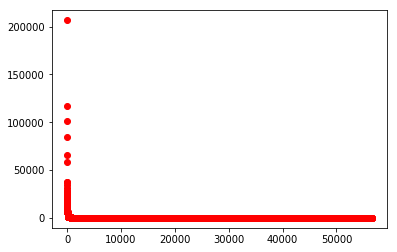

In [311]:
plt.figure()
plt.plot(xdata, ydata, 'ro')
plt.show()

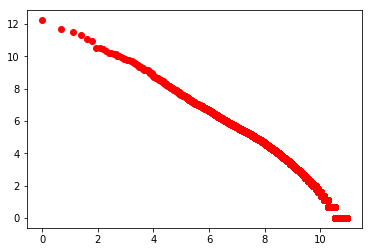

In [310]:
plt.figure()
plt.plot(logX, logY, 'ro')
plt.show()